In [2]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import triang

warnings.simplefilter(action='ignore', category=FutureWarning)

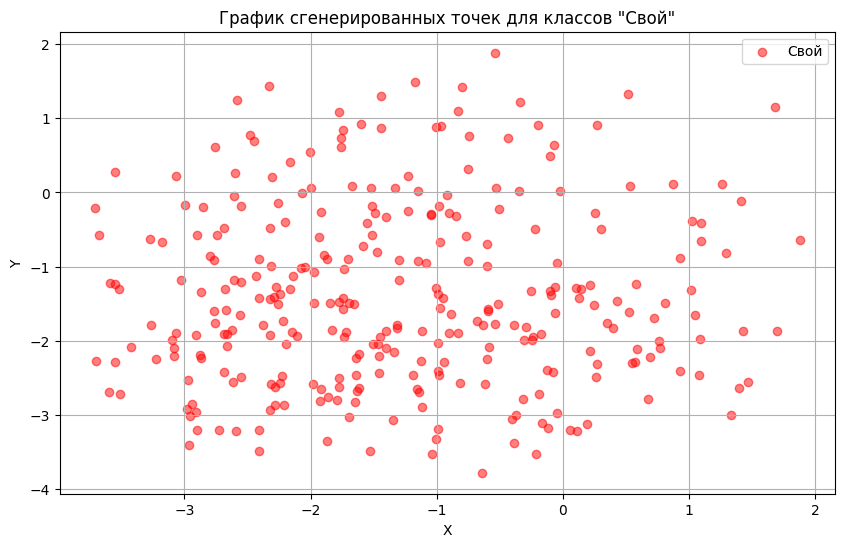

In [11]:
# Функция для генерации треугольного распределения
def generate_triangular_samples(num_samples, a, c, b):
    return triang.rvs(
        (c - a) / (b - a), 
        loc=a, 
        scale=b - a, 
        size=num_samples,
    )

# Шаг 1: Генерация данных
# Параметры для треугольного распределения (класс "Свой").
a_own, c_own, b_own = -4, -2, 2

# Количество выборок и размер каждой выборки
num_samples_own = 300

# Генерация выборок для классов "Свой" и "Чужой".
samples_own_x = generate_triangular_samples(
    num_samples_own, a_own, c_own, b_own,
)
samples_own_y = generate_triangular_samples(
    num_samples_own, a_own, c_own, b_own,
)

plt.figure(figsize=(10, 6))
plt.scatter(
    x=samples_own_x, 
    y=samples_own_y, 
    label='Свой', 
    color='red', 
    alpha=0.5,
)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('График сгенерированных точек для класса "Свой"')
plt.grid(True)

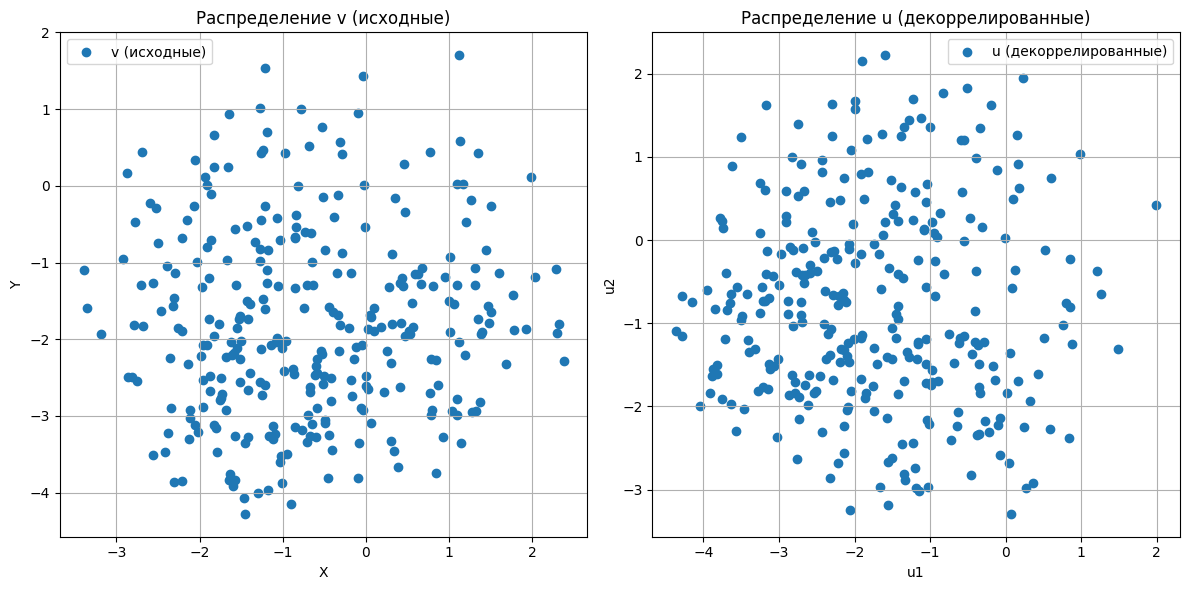

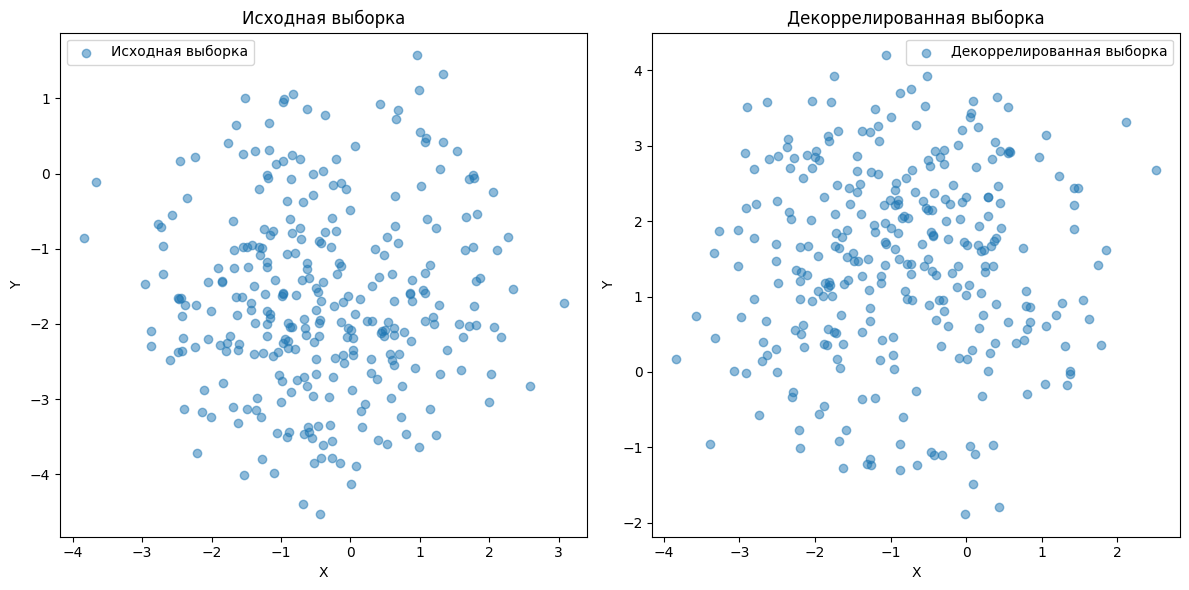

Дисперсия X (до декорреляции): 1.5861797684300578
Дисперсия Y (до декорреляции): 1.5006366390594565
Корреляция XY (до декорреляции): 0.03476298391405529
Ковариация XY (до декорреляции): 0.0538122424051512

Матрица корреляции (Q):
 [[1.         0.03476298]
 [0.03476298 1.        ]]

Матрица ковариации (R):
 [[1.59148472 0.05381224]
 [0.05381224 1.50565549]]

Обратная матрица Q^(-1):
 [[ 1.00120993 -0.03480504]
 [-0.03480504  1.00120993]]

Обратная матрица R^(-1):
 [[ 0.62910433 -0.02248424]
 [-0.02248424  0.66496614]]

Собственные числа матрицы Q:
 [0.96523702 1.03476298]

Собственные числа матрицы R:
 [1.61739903 1.47974118]

Собственные числа обратной матрицы Q^(-1):
 [1.03601497 0.96640488]

Собственные числа обратной матрицы R^(-1):
 [0.61827662 0.67579386]

Число обусловленности матрицы Q: 1.0720299435987646
Число обусловленности матрицы R: 1.0930283352550878
Число обусловленности обратной матрицы Q^(-1): 1.0720299435987648
Число обусловленности обратной матрицы R^(-1): 1.093028335

In [14]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.stats import triang

# Функция для генерации треугольного распределения
def generate_triangular_samples(num_samples, a, c, b):
    return triang.rvs(
        (c - a) / (b - a), 
        loc=a, 
        scale=b - a, 
        size=num_samples,
    )

# Параметры для треугольного распределения (класс "Свой").
a_own, c_own, b_own = -4, -2, 2

# Количество выборок и размер каждой выборки
num_samples_own = 300

# Генерация выборок для классов "Свой".
samples_own_x = generate_triangular_samples(
    num_samples_own, a_own, c_own, b_own,
)
samples_own_y = generate_triangular_samples(
    num_samples_own, a_own, c_own, b_own,
)

# Определение угла поворота в радианах
angle = np.radians(30)

# Матрица поворота
rotation_matrix = np.array([
    [np.cos(angle), -np.sin(angle)],
    [np.sin(angle), np.cos(angle)]
])

# Поворот выборок
samples_own_rotated = np.dot(rotation_matrix, np.vstack([samples_own_x, samples_own_y]))

# Расчет параметров до декорреляции
d_x_squared = np.var(samples_own_rotated[0])
d_y_squared = np.var(samples_own_rotated[1])
r_xy = np.corrcoef(samples_own_rotated)[0, 1]
q_xy = np.cov(samples_own_rotated)[0, 1]

# Матрицы корреляции и ковариации
Q = np.corrcoef(samples_own_rotated)
R = np.cov(samples_own_rotated)

# Обратные матрицы
Q_inv = la.inv(Q)
R_inv = la.inv(R)

# Собственные числа и векторы
eigenvalues_Q, eigenvectors_Q = la.eig(Q)
eigenvalues_R, eigenvectors_R = la.eig(R)
eigenvalues_Q_inv, eigenvectors_Q_inv = la.eig(Q_inv)
eigenvalues_R_inv, eigenvectors_R_inv = la.eig(R_inv)

# Составление матриц собственных чисел
lambda_Q = np.diag(eigenvalues_Q)
lambda_R = np.diag(eigenvalues_R)
lambda_Q_inv = np.diag(eigenvalues_Q_inv)
lambda_R_inv = np.diag(eigenvalues_R_inv)

# Нормализация собственных векторов
normalized_eigenvectors_Q = eigenvectors_Q / la.norm(eigenvectors_Q, axis=0)
normalized_eigenvectors_R = eigenvectors_R / la.norm(eigenvectors_R, axis=0)
normalized_eigenvectors_Q_inv = eigenvectors_Q_inv / la.norm(eigenvectors_Q_inv, axis=0)
normalized_eigenvectors_R_inv = eigenvectors_R_inv / la.norm(eigenvectors_R_inv, axis=0)

# Составление матрицы собственных векторов
D_Q = normalized_eigenvectors_Q
D_R = normalized_eigenvectors_R

# Матрица декорреляционного преобразования
D_inv_Q = la.inv(D_Q)

# Проверка разложения Q = D * lambda^Q * D^(-1)
check_Q = np.dot(D_Q, np.dot(lambda_Q, D_inv_Q))

# Декорреляция
samples_decorrelated = np.dot(D_inv_Q, samples_own_rotated)

# Проверка, что после декорреляции выборка совпала с исходной
assert np.allclose(samples_own_rotated, np.dot(D_Q, samples_decorrelated))

# Отображение графически распределений
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(samples_own_rotated[0], samples_own_rotated[1], alpha=0.5, label='Исходная выборка')
plt.title('Исходная выборка')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(samples_decorrelated[0], samples_decorrelated[1], alpha=0.5, label='Декоррелированная выборка')
plt.title('Декоррелированная выборка')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()

# Вывод результатов
print("Дисперсия X (до декорреляции):", d_x_squared)
print("Дисперсия Y (до декорреляции):", d_y_squared)
print("Корреляция XY (до декорреляции):", r_xy)
print("Ковариация XY (до декорреляции):", q_xy)

# Вывод матриц
print("\nМатрица корреляции (Q):\n", Q)
print("\nМатрица ковариации (R):\n", R)
print("\nОбратная матрица Q^(-1):\n", Q_inv)
print("\nОбратная матрица R^(-1):\n", R_inv)

# Вывод собственных чисел
print("\nСобственные числа матрицы Q:\n", eigenvalues_Q)
print("\nСобственные числа матрицы R:\n", eigenvalues_R)
print("\nСобственные числа обратной матрицы Q^(-1):\n", eigenvalues_Q_inv)
print("\nСобственные числа обратной матрицы R^(-1):\n", eigenvalues_R_inv)

# Вывод чисел обусловленности
print("\nЧисло обусловленности матрицы Q:", max(eigenvalues_Q) / min(eigenvalues_Q))
print("Число обусловленности матрицы R:", max(eigenvalues_R) / min(eigenvalues_R))
print("Число обусловленности обратной матрицы Q^(-1):", max(eigenvalues_Q_inv) / min(eigenvalues_Q_inv))
print("Число обусловленности обратной матрицы R^(-1):", max(eigenvalues_R_inv) / min(eigenvalues_R_inv))

In [15]:
D_Q

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [16]:
D_inv_Q

array([[-0.70710678,  0.70710678],
       [-0.70710678, -0.70710678]])

In [17]:
la.inv(D_Q)

array([[-0.70710678,  0.70710678],
       [-0.70710678, -0.70710678]])